# Employee attrition
Dataset source: https://github.com/mrMichalR/Classification/blob/main/df2.csv

In [777]:
# !pip install sklearn
# !pip install plotnine
# !pip install plotly
# !pip install seaborn

# Import libraries

In [778]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
#import statsmodels.formula.api as smf
#import statsmodels.api as sm## for machine learning
from numpy import mean
from numpy import std

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition## for explainer
from sklearn.metrics import RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.linear_model import LogisticRegression, LinearRegression


from pandas.api.types import CategoricalDtype
from plotnine import *
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

# EDA

In [779]:
data_df = pd.read_csv('df2.csv')

In [780]:
data_df

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [781]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [782]:
data_df.isnull().sum()

EmployeeNumber                0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Attrition                   147
YearlyIncome                  0
dtype: int64

In [783]:
data_df.nunique()

EmployeeNumber              4449
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears            172
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany               166
YearsInCurrentRole           164
YearsSinceLastPromotion      153
YearsWithCurrManager         157
Attrition                      2
YearlyIncome                1349
dtype: int64

In [784]:
data_df.describe(include="all")

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,4449.000000,4449,4449,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4302,4449.000000
unique,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,4449,3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2222,NaN
mean,7956.865588,NaN,NaN,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,NaN,77621.952798
std,17226.922333,NaN,NaN,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,NaN,56194.865060
min,1.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,12108.000000
25%,1735.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN,34788.000000
50%,5902.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN,58512.000000
75%,7014.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,NaN,100152.000000


In [785]:
# class distribution check

print(data_df.groupby("Attrition").size())
# data_df["Attrition"].value_counts()

Attrition
No     2080
Yes    2222
dtype: int64


Classes are quite balanced

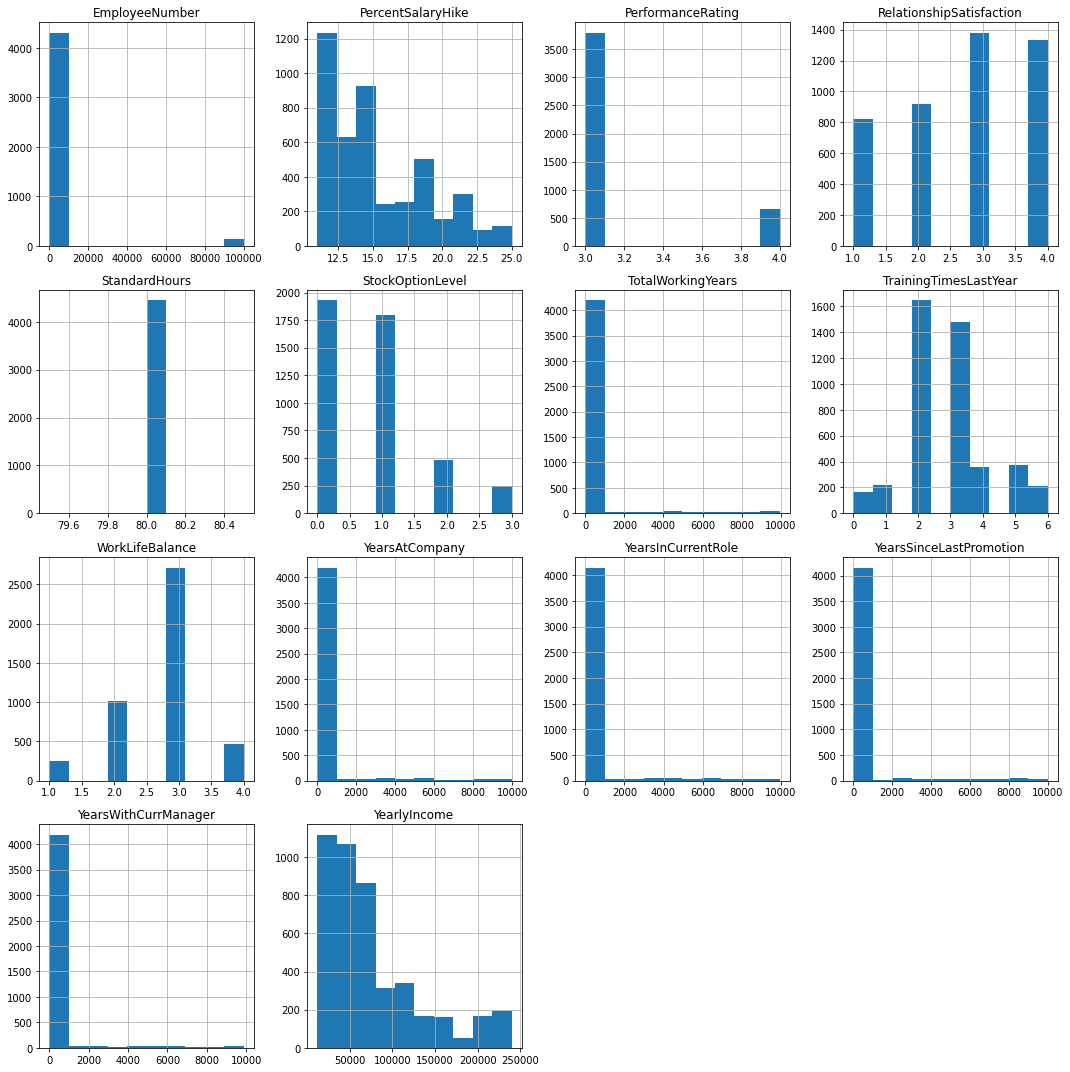

In [786]:
# histograms
data_df.hist(figsize=(15, 15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

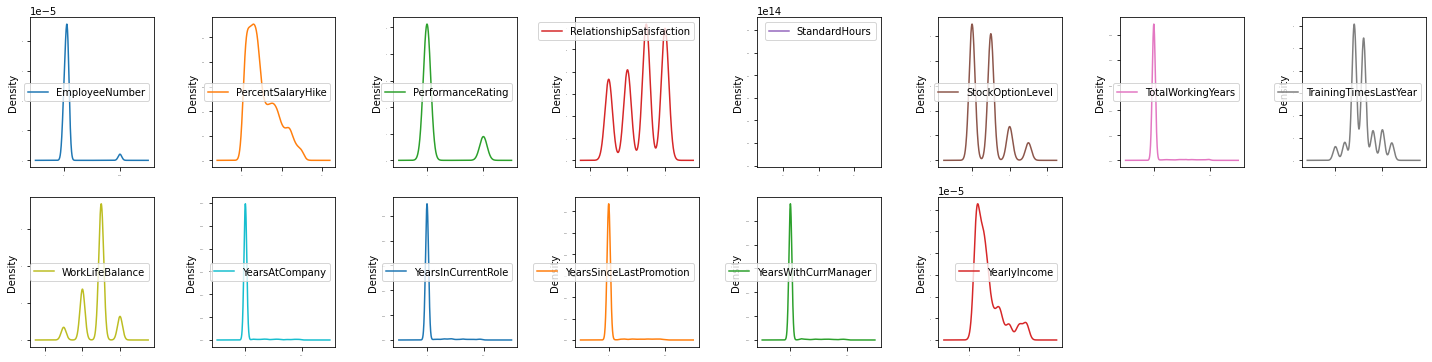

In [787]:
# density
data_df.plot(kind='density', figsize=(20, 20), subplots=True, layout=(8,8), sharex=False, sharey=False, legend=True, fontsize=1)
plt.tight_layout()
plt.show()

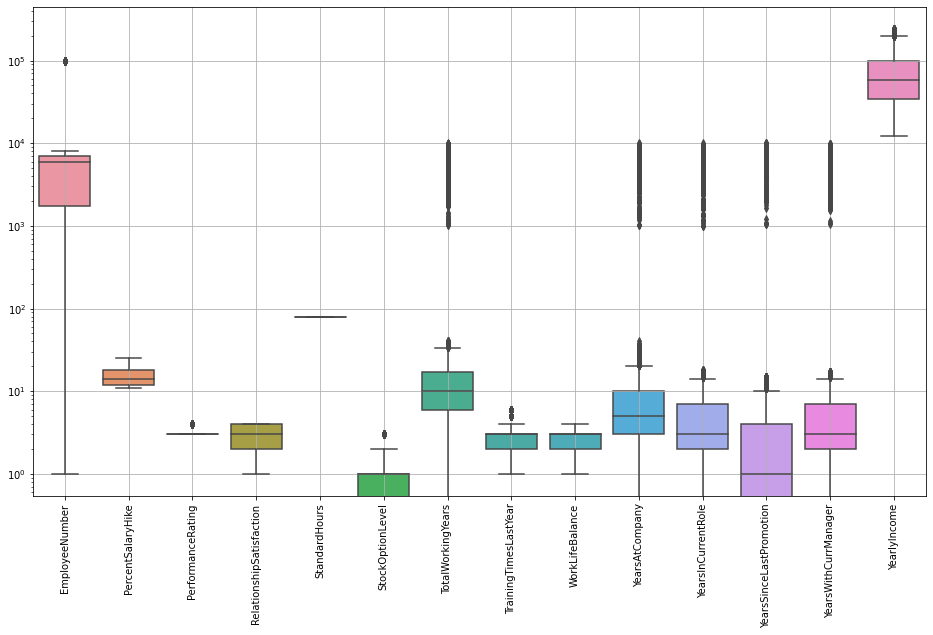

In [788]:
ax = sns.boxplot(data=data_df, orient="v", showfliers=True)
# ax.set_ylim()
ax.set_yscale("log")
plt.xticks(rotation = 90)
plt.grid(visible=True, which='major', axis='both')

<AxesSubplot:>

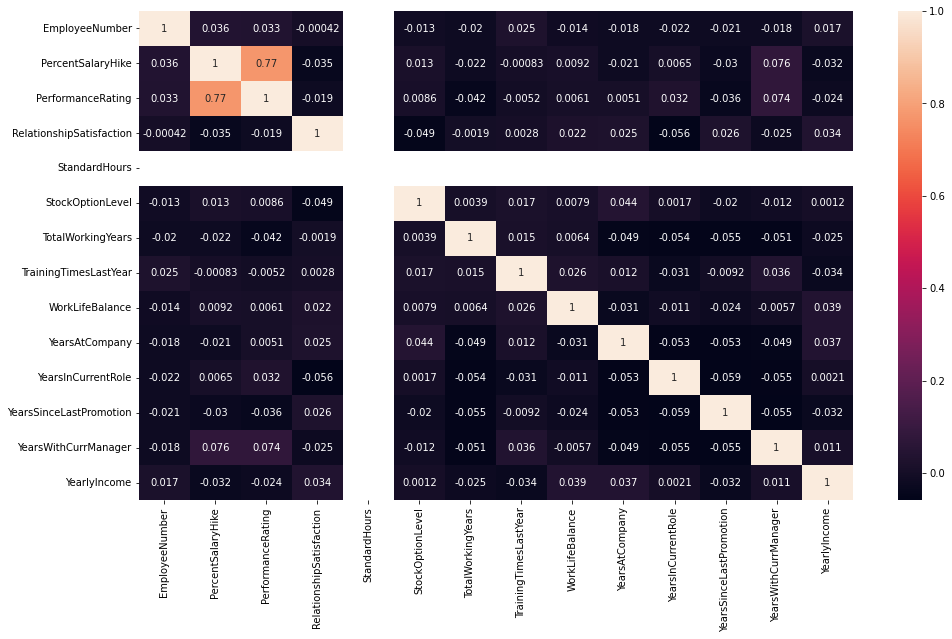

In [789]:
plt.rcParams["figure.figsize"] = [16,9]
sns.heatmap(data_df.corr(), annot=True)

### Conclusion/summary:
- Dataset trimmed becasue target has null values
- 'EmployeeNumber' has no meaning here = drop
- Features with zero variance = drop: 
    - 'Over18' ("object")
    - 'StandardHours' ('float64')
- Target value 'Attrition' has 147 missing values that can be removed or imputed
- Outliers in: 
    - TotalWorkingYears:
        - max = 9939 -> not possible! => worth to check how many values
    - YearsAtCompany: 
        - max = 9937 -> not possible! => worth to check how many values
    - YearsSinceLastPromotion: 
        - max = 9990 -> not possible! => worth to check how many values
    - YearsWithCurrManager: 
        - max = 9882 -> not possible! => worth to check how many values

# Remove indexes for Attrition missing values

In [790]:
data_df.dropna(axis=0, inplace=True)
# print(data_df.shape, "\n")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Over18                    4302 non-null   object 
 2   OverTime                  4302 non-null   object 
 3   PercentSalaryHike         4302 non-null   float64
 4   PerformanceRating         4302 non-null   float64
 5   RelationshipSatisfaction  4302 non-null   float64
 6   StandardHours             4302 non-null   float64
 7   StockOptionLevel          4302 non-null   float64
 8   TotalWorkingYears         4302 non-null   float64
 9   TrainingTimesLastYear     4302 non-null   float64
 10  WorkLifeBalance           4302 non-null   float64
 11  YearsAtCompany            4302 non-null   float64
 12  YearsInCurrentRole        4302 non-null   float64
 13  YearsSinceLastPromotion   4302 non-null   float64
 14  YearsWit

Rada od Piotra = sprawdzić które kolumny mają wartości absurdalne. Czy tylko ta kolumna jest absurdalna a reszta danych jest OK. Jeśli tak to warto zatrzymać te dane. Wtedy wartości absurdalne (np. Age= 1100 lub 9000) zastąpić na NaN i potem zamienić NaN na średnią lub medianą. 

# Train / test split

In [791]:
X = data_df.drop('Attrition', axis=1) # zmienne niezależne (features)
y = data_df['Attrition'] # zmienna zależna (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X_train dimension = ", X_train.shape)
print("X_test dimension = ", X_test.shape)
print("y_train dimension = ", y_train.shape)
print("y_train dimension = ", y_test.shape)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

X_train dimension =  (3441, 16)
X_test dimension =  (861, 16)
y_train dimension =  (3441,)
y_train dimension =  (861,)


# Data cleaning

## Delete Rows That Contain Duplicate Data

In [792]:
dups = X_train.duplicated()
# report if there are any duplicates
print("Duplicates number:", dups.sum(),"\n")
# list all duplicate rows
print(X_train[dups])

Duplicates number: 0 

Empty DataFrame
Columns: [EmployeeNumber, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, YearlyIncome]
Index: []


In [793]:
# delete duplicate rows
if (dups.sum()!=0):
    X_train.drop_duplicates(inplace=True)
    print(X_train.shape)
else: 
    print("No duplicates")
# X_train

No duplicates


## Drop redundant columns

In [794]:
redundant_col = []
redundant_col.append('EmployeeNumber')

In [795]:
X_train.drop(redundant_col, axis=1, inplace=True)

/tmp/ipykernel_6379/3647248156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [796]:
X_train.shape

(3441, 15)

## Delete Columns That Contain a Single Value

In [797]:
X_train.shape

(3441, 15)

In [798]:
# get number of unique values for each column
counts = X_train.nunique()
print(counts, "\n") 

# record columns to delete
to_del = [i for i,v in enumerate(counts) if v==1]
print(to_del,X_train.columns[to_del])

Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears            158
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany               158
YearsInCurrentRole           153
YearsSinceLastPromotion      146
YearsWithCurrManager         142
YearlyIncome                1321
dtype: int64 

[0, 5] Index(['Over18', 'StandardHours'], dtype='object')


In [799]:
# # drop useless columns
X_train.drop(X_train.columns[to_del], axis=1, inplace=True)
# X_train.info()
X_train.shape

/tmp/ipykernel_6379/2256499488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(3441, 13)

## Remove columns that have a low variance

>Threshold=0.00, Features=12
>Threshold=0.10, Features=12
>Threshold=0.20, Features=11
>Threshold=0.30, Features=11
>Threshold=0.40, Features=11
>Threshold=0.50, Features=11
>Threshold=0.60, Features=10
>Threshold=0.70, Features=10
>Threshold=0.80, Features=9


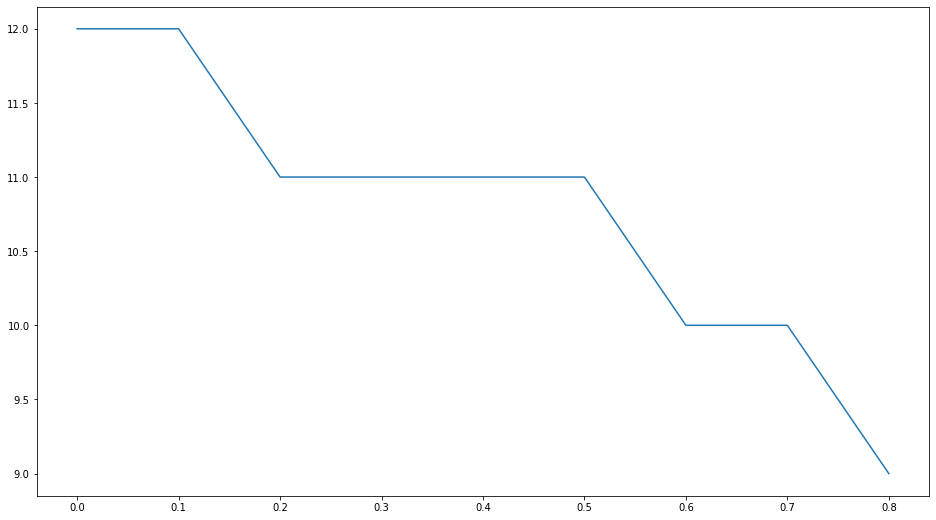

In [800]:
# define thresholds to check
thresholds = np.arange(0.0, 0.9, 0.1)
# apply transform with each threshold
results = list()
X_train_numeric = X_train.select_dtypes(include=np.number)
# X_train_numeric

for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X_train_numeric)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

In [801]:
# X_test.info()

# Encoding

In [802]:
# categorical_columns_ls = X_train.select_dtypes(["object", "category"]).columns.to_list()

X_train_enc, X_test_enc, y_train_enc, y_test_enc = [pd.get_dummies(
    data = df, 
    prefix = None, 
    prefix_sep = '_', 
    dummy_na = False, 
    columns = None, 
    sparse = False, 
    drop_first = True, 
    dtype = 'int8'
) for df in [X_train, X_test, y_train, y_test]]
        

In [803]:
X_train = X_train_enc
X_test = X_test_enc
y_train = y_train_enc
y_test = y_test_enc

In [804]:
# # Heat-map correlation
# # plt.figure(figsize=(16,9)) 
# plt.rcParams["figure.figsize"] = [len(X_train.columns), len(X_train.columns)]
# sns.heatmap(X_train.corr(), annot=True)

In [805]:
# # corr = data_df2_drop.corr()
# # kot = data_df2_drop.corr()[data_df2_drop.corr()>0.05]
# plt.figure(figsize=(len(X_train.columns), len(X_train.columns)))
# sns.heatmap(X_train.corr()[X_train.corr()>0.05], annot=True)

In [806]:
# sns.pairplot(kot)

In [807]:
# corr_abs_value = X_train.corr().abs()
# s = corr_abs_value.unstack()

X_train_sort = X_train.corr()[X_train.corr() < 1].abs().unstack().sort_values(ascending = False , kind="quicksort")
print(X_train_sort)

PercentSalaryHike        PerformanceRating          0.764793
PerformanceRating        PercentSalaryHike          0.764793
YearsWithCurrManager     PerformanceRating          0.077937
PerformanceRating        YearsWithCurrManager       0.077937
PercentSalaryHike        YearsWithCurrManager       0.073416
                                                      ...   
YearsInCurrentRole       YearsInCurrentRole              NaN
YearsSinceLastPromotion  YearsSinceLastPromotion         NaN
YearsWithCurrManager     YearsWithCurrManager            NaN
YearlyIncome             YearlyIncome                    NaN
OverTime_Yes             OverTime_Yes                    NaN
Length: 169, dtype: float64


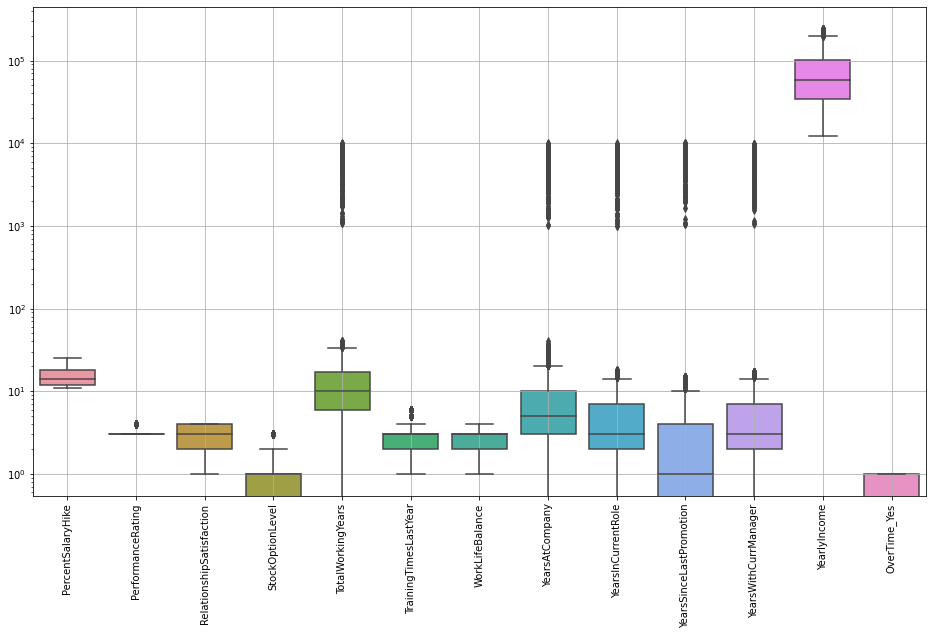

In [808]:
# sns.boxplot(data=outlier_df, x=outlier_df.columns)
# sns.boxplot(x=outlier_df.columns)
# plt.figure(figsize=(16,9))
ax = sns.boxplot(data=X_train, orient="v", showfliers=True)
# ax.set_ylim()
ax.set_yscale("log")
plt.xticks(rotation = 90)
plt.grid(visible=True, which='major', axis='both')

# Evaluate Algorithms: Baseline

In [809]:
# Test options and evaluation metric
num_folds = 10
# seed = 42
scoring = 'accuracy'

In [810]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [811]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=False, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.590222 (0.033192)
LDA: 0.592835 (0.029480)
KNN: 0.514966 (0.030833)


/home/michal/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/home/michal/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this war

CART: 0.493171 (0.032709)
NB: 0.568718 (0.033437)
SVM: 0.515549 (0.007695)


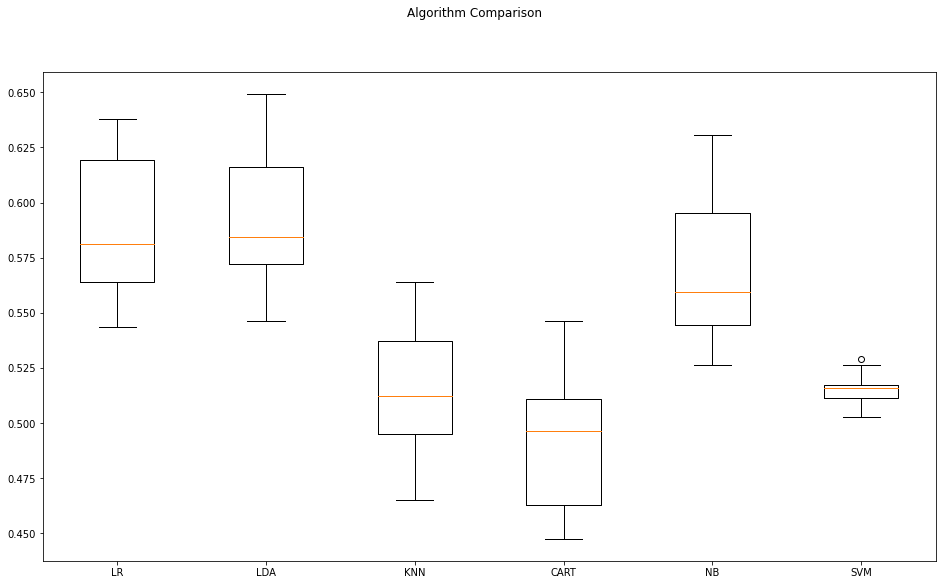

In [812]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Evaluate Algorithms: Standardize Data

In [813]:
# for df in [X_train, X_test, y_train, y_test]:
#     print(df.info())

In [814]:
# Standardize the dataset
pipelines = []
pipelines.append(('Scaled_LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('Scaled_LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaled_KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled_CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled_NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('Scaled_SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=False, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled_LR: 0.593415 (0.029515)
Scaled_LDA: 0.592835 (0.029480)


/home/michal/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/home/michal/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this war

Scaled_KNN: 0.531816 (0.021469)
Scaled_CART: 0.492299 (0.025142)
Scaled_NB: 0.570752 (0.034011)
Scaled_SVM: 0.577726 (0.031414)


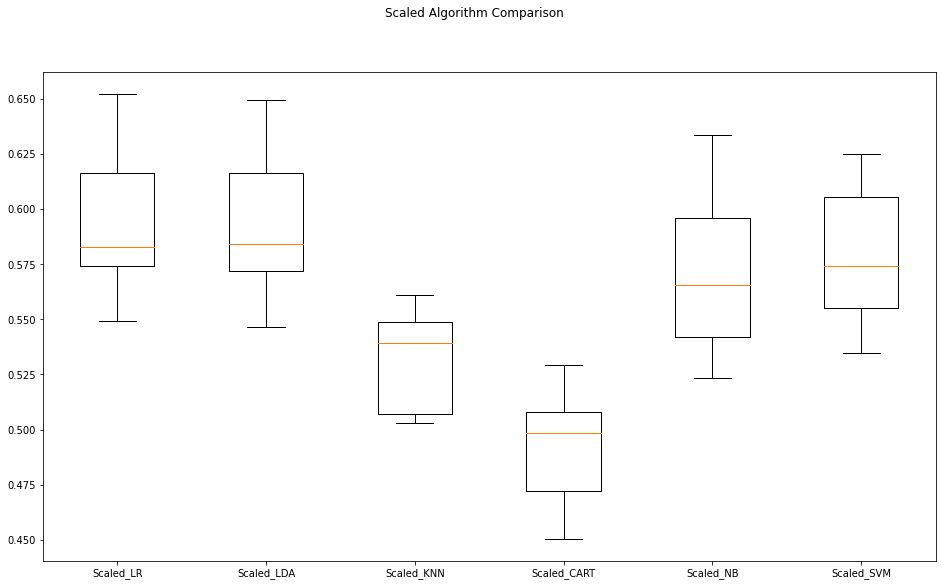

In [815]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Evaluate Algorithms: PowerTransformer

In [816]:
# X_train.value_counts()

In [817]:
# # separate into input and output columns
# X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X_train.astype('float32')
y = LabelEncoder().fit_transform(y_train.astype('str'))
y


/home/michal/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([1, 0, 0, ..., 1, 0, 0])

In [818]:
# PowerTransformer(yeo-johnson = default)
pipelines = []
pipelines.append(('PowerTransformed_LR', Pipeline([('Transformer', PowerTransformer()),('LR', LogisticRegression())])))
pipelines.append(('PowerTransformed_LDA', Pipeline([('Transformer', PowerTransformer()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('PowerTransformed_KNN', Pipeline([('Transformer', PowerTransformer()),('KNN', KNeighborsClassifier())])))
pipelines.append(('PowerTransformed_CART', Pipeline([('Transformer', PowerTransformer()),('CART', DecisionTreeClassifier())])))
pipelines.append(('PowerTransformed_NB', Pipeline([('Transformer', PowerTransformer()),('NB', GaussianNB())])))
pipelines.append(('PowerTransformed_SVM', Pipeline([('Transformer', PowerTransformer()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=False, random_state=None)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages

PowerTransformed_LR: 0.526577 (0.021997)


/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages

PowerTransformed_LDA: 0.526577 (0.021997)


/home/michal/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the

PowerTransformed_KNN: 0.530943 (0.022480)


/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages

PowerTransformed_CART: 0.493756 (0.029528)


/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages

PowerTransformed_NB: 0.588469 (0.032006)


/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
/home/michal/.local/lib/python3.10/site-packages

PowerTransformed_SVM: 0.590805 (0.020346)


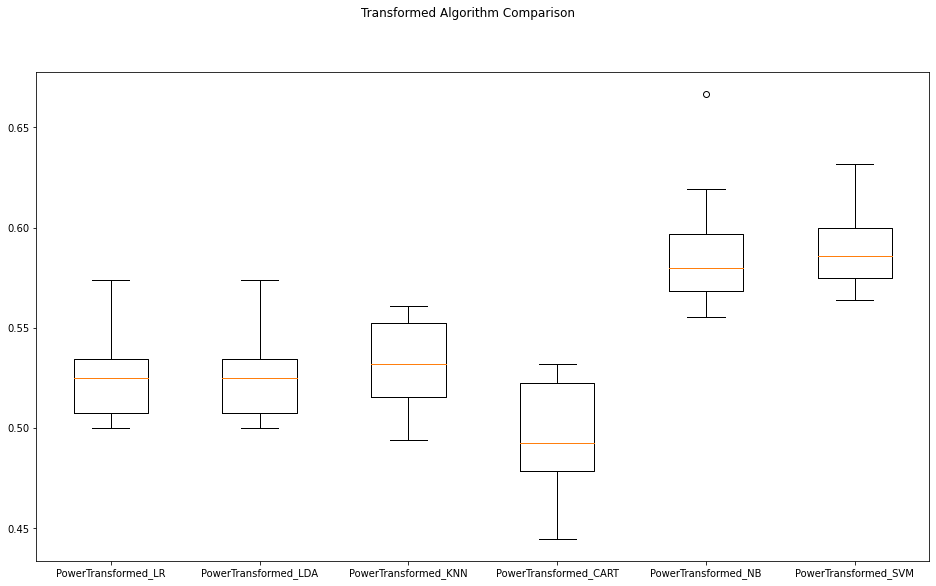

In [819]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Transformed Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [820]:
# PowerTransformer(box-cox)
pipelines = []
pipelines.append(('MM_&_PT_LR', Pipeline([('Scaler', MinMaxScaler(feature_range=(1, 2))), ('Transformer', PowerTransformer(method='box-cox')),('LR', LogisticRegression())])))
pipelines.append(('MM_&_PT_LDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(1, 2))), ('Transformer', PowerTransformer(method='box-cox')),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('MM_&_PT_KNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(1, 2))), ('Transformer', PowerTransformer(method='box-cox')),('KNN', KNeighborsClassifier())])))
pipelines.append(('MM_&_PT_CART', Pipeline([('Scaler', MinMaxScaler(feature_range=(1, 2))), ('Transformer', PowerTransformer(method='box-cox')),('CART', DecisionTreeClassifier())])))
pipelines.append(('MM_&_PT_NB', Pipeline([('Scaler', MinMaxScaler(feature_range=(1, 2))), ('Transformer', PowerTransformer(method='box-cox')),('NB', GaussianNB())])))
pipelines.append(('MM_&_PT_SVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(1, 2))), ('Transformer', PowerTransformer(method='box-cox')),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=False, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

MM_&_PT_LR: 0.602717 (0.030522)
MM_&_PT_LDA: 0.601553 (0.031337)


/home/michal/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/home/michal/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this war

MM_&_PT_KNN: 0.538206 (0.027707)
MM_&_PT_CART: 0.491138 (0.028809)
MM_&_PT_NB: 0.594000 (0.030922)
MM_&_PT_SVM: 0.596036 (0.030483)


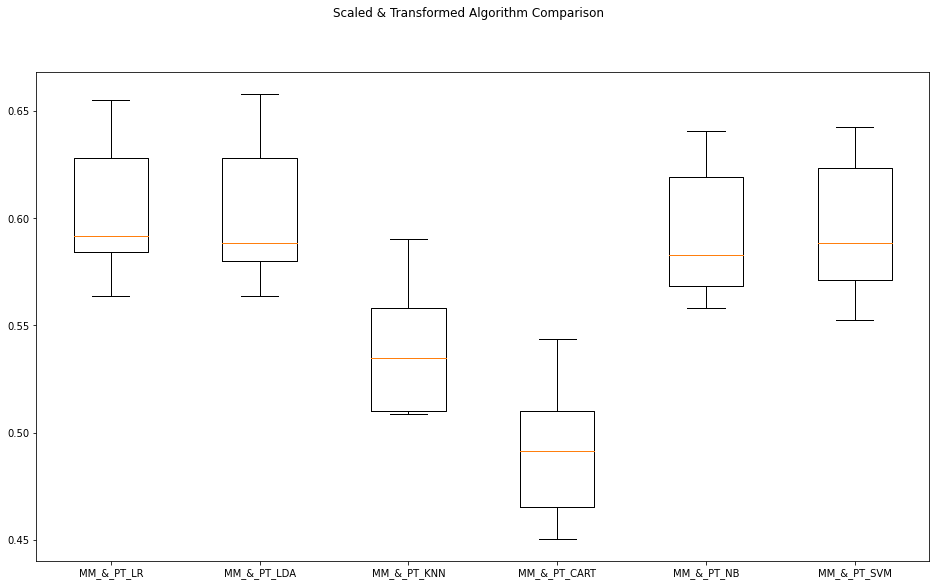

In [821]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled & Transformed Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

outliers detection

evaluate with deleted

imput outliers and evaluate

_


imput missing targets, check balance, evaluate with best algorythm, validate 

### LogisticRegression - metrics

In [ ]:
print(classification_report(y_train, lr_y_pred_train))
print(classification_report(y_test, lr_y_pred))

### LogisticRegression - confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# %matplotlib inline

lr_cm_train = confusion_matrix(y_train, lr_y_pred_train)
sns.heatmap(lr_cm_train, annot=True, fmt='d')
plt.show()

In [372]:
lr_cm_train

NameError: name 'lr_cm_train' is not defined

In [373]:
lr_cm = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(lr_cm, annot=True, fmt='d')

NameError: name 'lr_y_pred' is not defined

In [374]:
lr_cm

NameError: name 'lr_cm' is not defined

In [375]:
metrics.plot_roc_curve(lr_clf, X_train, y_train)
plt.show()

NameError: name 'lr_clf' is not defined

In [376]:
RocCurveDisplay.from_estimator(lr_clf, X_test, y_test)
plt.show()

# or

# metrics.plot_roc_curve(lr_clf, X_test, y_test)
# plt.show()

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_estimator'

In [377]:
RocCurveDisplay.from_predictions(y_test, lr_y_pred)
plt.show()

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_predictions'

WNIOSKI:
- Porownujac metryki wynika ze model jest stabilny - metryki zblizone- 
- Metryki na dość niskim poziomie
- Do poprawy metryk: 
    - uzupelnienie brakującyh wartości tragetu,  
    - zastosować skalowanie (w tym przypadku standardscaler)

# Outliers

In [817]:
outlier_columns = [
    'TotalWorkingYears', 
    'YearsAtCompany' , 
    'YearsInCurrentRole', 
    'YearsSinceLastPromotion' , 
    'YearsWithCurrManager'
]
X_train_outliers = X_train[outlier_columns]
X_train_outliers.describe()

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,3559.000000,3559.000000,3559.000000,3559.000000,3559.000000
mean,350.974431,307.120539,368.274515,391.479629,297.511099
std,1504.538734,1367.899346,1492.360845,1573.073736,1346.055950
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,2.000000,0.000000,2.000000
50%,10.000000,5.000000,3.000000,1.000000,3.000000
75%,17.000000,10.000000,7.000000,4.000000,7.000000
max,9939.000000,9984.000000,9937.000000,9952.000000,9882.000000


MinMax or StandardScaler are sensitive to outliers high value. 

Better to use RobustScaler or PowerTransformer. For education decided to use PowerTransformer.


Source:
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

### BOX plot

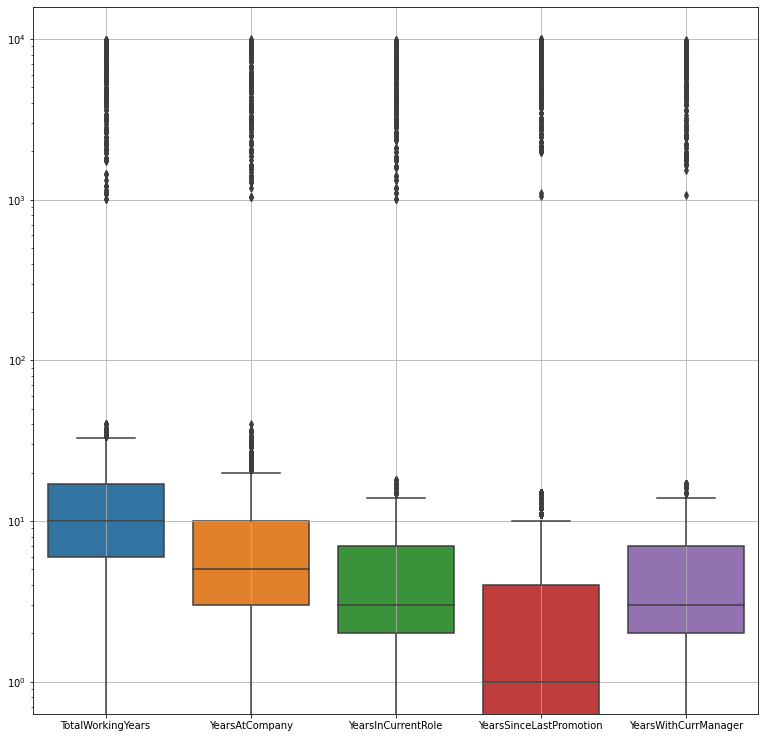

In [818]:
# sns.boxplot(data=outlier_df, x=outlier_df.columns)
# sns.boxplot(x=outlier_df.columns)
ax = sns.boxplot(data=X_train_outliers, orient="v", showfliers=True)
# ax.set_ylim()
ax.set_yscale("log")
plt.grid(visible=True, which='major', axis='both')

In [819]:
X_train_outliers[X_train_outliers.values > 100]

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,10.0,4.0,0.0,5308.0,3.0
5,6.0,5.0,3.0,4.0,1067.0
6,14.0,14.0,8.0,9.0,5168.0
9,6.0,6.0,3683.0,1.0,5.0
10,12.0,5.0,3.0,2166.0,2.0
...,...,...,...,...,...
3543,3.0,2.0,1.0,0.0,6654.0
3544,5670.0,4.0,2.0,1.0,3.0
3549,7.0,3.0,4252.0,1.0,2.0
3552,8.0,4706.0,2.0,0.0,2.0


### Outliers removal

In [820]:
threshold = 100 # taken arbitraly looking at X_train_outliers box plot

In [822]:
mask = X_train_outliers[((X_train_outliers > threshold)).any(axis=1)]
mask

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,10.0,4.0,0.0,5308.0,3.0
5,6.0,5.0,3.0,4.0,1067.0
6,14.0,14.0,8.0,9.0,5168.0
9,6.0,6.0,3683.0,1.0,5.0
10,12.0,5.0,3.0,2166.0,2.0
...,...,...,...,...,...
3543,3.0,2.0,1.0,0.0,6654.0
3544,5670.0,4.0,2.0,1.0,3.0
3549,7.0,3.0,4252.0,1.0,2.0
3552,8.0,4706.0,2.0,0.0,2.0


In [825]:
# X_train = X_train[~((X_train_outliers > threshold)).any(axis=1)] #removing outliers -> correct to replace outliers with nan
# X_train

mask.loc[mask[outlier_columns] > threshold] = np.nan

KeyError: "None of [Index([                              ('T', 'o', 't', 'a', 'l', 'W', 'o', 'r', 'k', 'i', 'n', 'g', 'Y', 'e', 'a', 'r', 's'),\n                                                    ('Y', 'e', 'a', 'r', 's', 'A', 't', 'C', 'o', 'm', 'p', 'a', 'n', 'y'),\n                                ('Y', 'e', 'a', 'r', 's', 'I', 'n', 'C', 'u', 'r', 'r', 'e', 'n', 't', 'R', 'o', 'l', 'e'),\n       ('Y', 'e', 'a', 'r', 's', 'S', 'i', 'n', 'c', 'e', 'L', 'a', 's', 't', 'P', 'r', 'o', 'm', 'o', 't', 'i', 'o', 'n'),\n                      ('Y', 'e', 'a', 'r', 's', 'W', 'i', 't', 'h', 'C', 'u', 'r', 'r', 'M', 'a', 'n', 'a', 'g', 'e', 'r')],\n      dtype='object')] are in the [index]"

In [781]:
X_train.isna().sum()

PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
YearlyIncome                0
OverTime_Yes                0
dtype: int64

### Imputing outliers

In [782]:
iter_imp = IterativeImputer(
    estimator=None,
    missing_values=nan, 
    sample_posterior=False, 
    max_iter=10, 
    tol=0.001, 
    n_nearest_features=None, 
    initial_strategy='mean', 
    imputation_order='ascending', 
    skip_complete=False, 
    min_value=-inf, 
    max_value=inf, 
    verbose=0, 
    random_state=42, 
    add_indicator=False)

iter_imp.fit(X_train)

# X_train_outlier = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
iter_imputer.transform(mask)

NameError: name 'nan' is not defined

# Outliers handling

In [84]:
# cov = EllipticEnvelope(random_state=42).fit(X_train)
# # predict returns 1 for an inlier and -1 for an outlier
# # cov.predict()

# cov.covariance_
# cov.location_

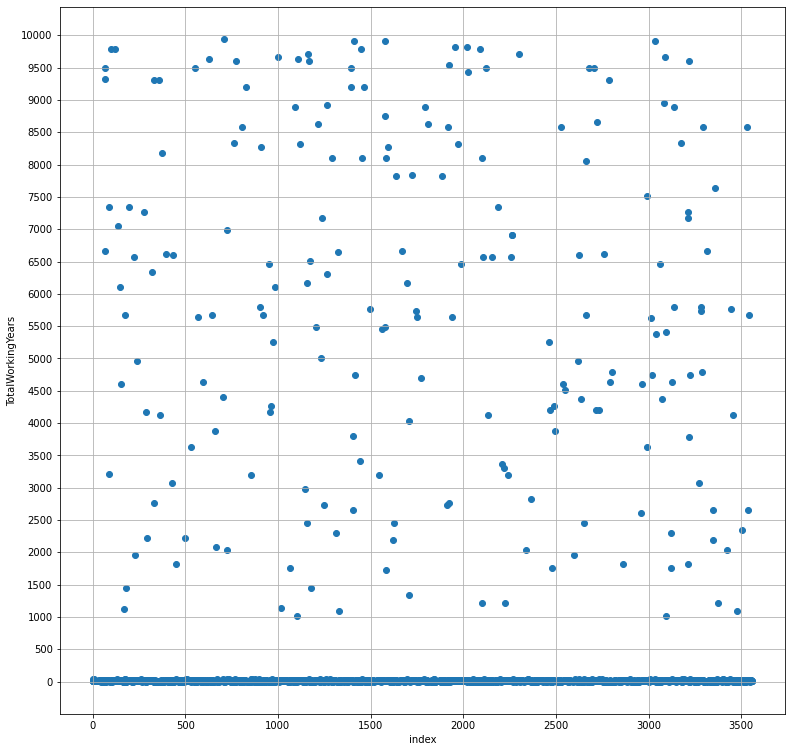

In [85]:
plt.scatter(X_train.index, X_train['TotalWorkingYears'])
plt.xlabel('index')
plt.ylabel('TotalWorkingYears')
plt.yticks(np.arange(0, 10500, step=500))
plt.grid(visible=True, which='major', axis='both')

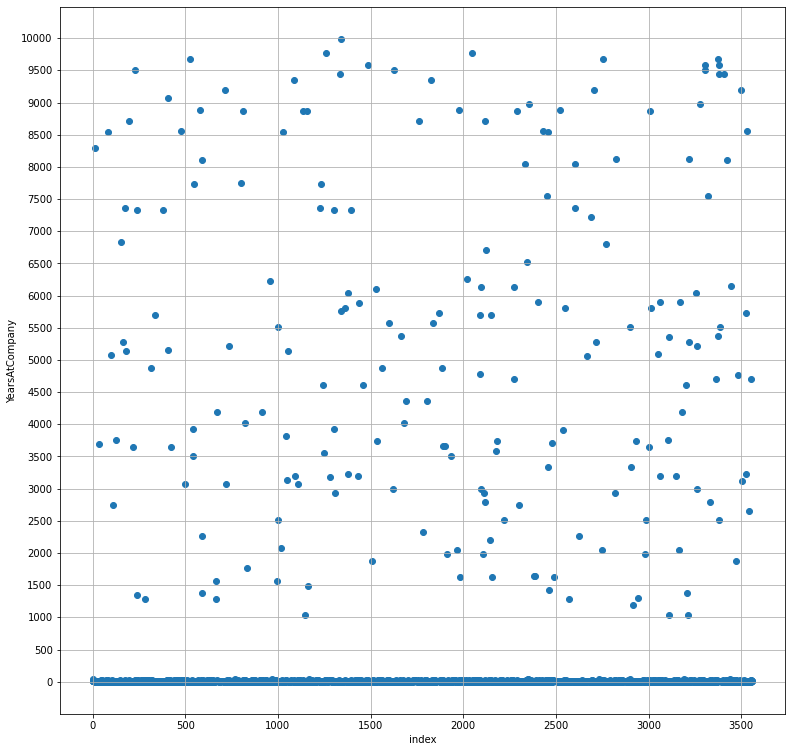

In [90]:
plt.scatter(X_train.index, X_train['YearsAtCompany'])
plt.xlabel('index')
plt.ylabel('YearsAtCompany')
plt.yticks(np.arange(0, 10500, step=500))
plt.grid(visible=True, which='major', axis='both')

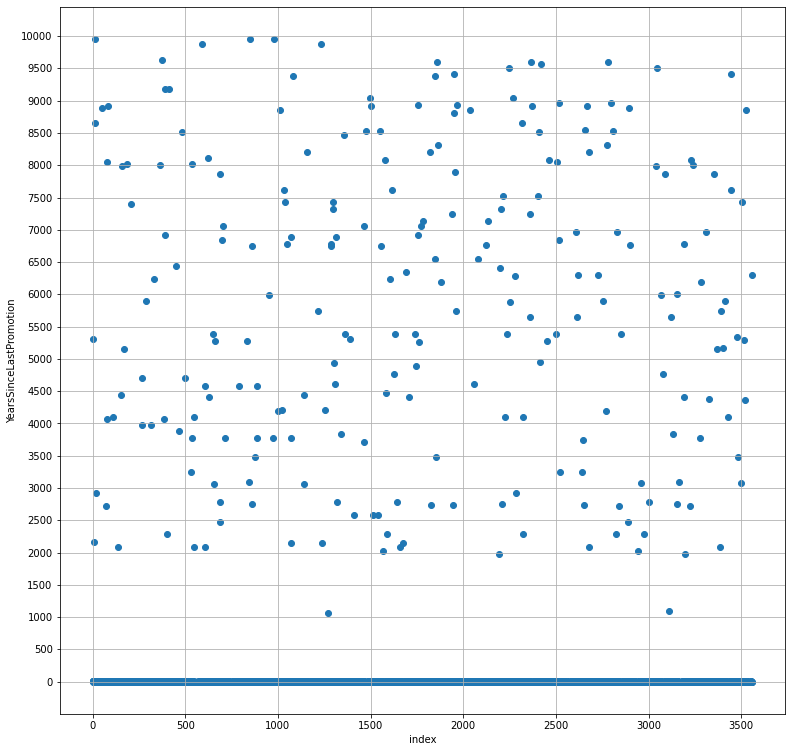

In [91]:
plt.scatter(X_train.index, X_train['YearsSinceLastPromotion'])
plt.xlabel('index')
plt.ylabel('YearsSinceLastPromotion')
plt.yticks(np.arange(0, 10500, step=500))
plt.grid(visible=True, which='major', axis='both')

In [92]:
# df_enc[df_enc['YearsSinceLastPromotion'] > 500]

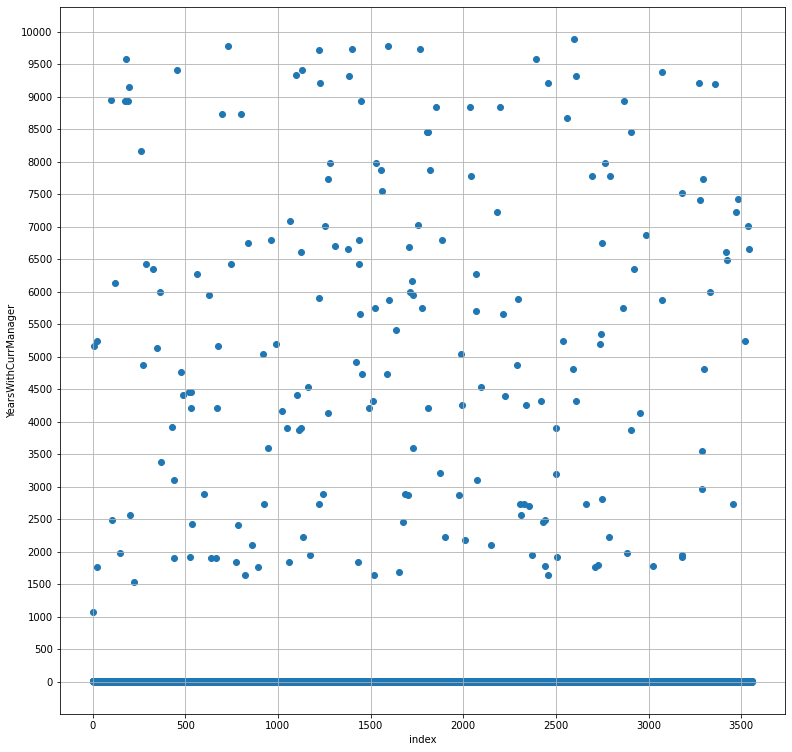

In [93]:
plt.scatter(X_train.index, X_train['YearsWithCurrManager'])
plt.xlabel('index')
plt.ylabel('YearsWithCurrManager')
plt.yticks(np.arange(0, 10500, step=500))
plt.grid(visible=True, which='major', axis='both')

In [95]:
X_train[X_train['YearsWithCurrManager'] > 500]

,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,OverTime_Yes
5,13.0,3.0,2.0,2.0,6.0,3.0,2.0,5.0,3.0,4.0,1067.0,33384.0,1
6,11.0,3.0,3.0,0.0,14.0,2.0,2.0,14.0,8.0,9.0,5168.0,124800.0,0
22,11.0,3.0,3.0,0.0,8.0,2.0,3.0,4.0,2.0,1.0,5233.0,35520.0,0
25,13.0,3.0,1.0,0.0,18.0,2.0,3.0,7.0,7.0,1.0,1759.0,49296.0,0
98,13.0,3.0,4.0,0.0,10.0,2.0,1.0,9.0,2.0,3.0,8954.0,60504.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,20.0,4.0,3.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,7230.0,24996.0,0
3484,11.0,3.0,3.0,0.0,14.0,3.0,3.0,10.0,7.0,0.0,7420.0,68916.0,1
3520,11.0,3.0,1.0,0.0,5.0,3.0,3.0,5.0,4.0,0.0,5242.0,53736.0,1
3535,11.0,3.0,1.0,1.0,16.0,6.0,3.0,16.0,7.0,3.0,7012.0,123900.0,1


Dla powyższych 4 feature-ów zrobić:
1) kNN v regresja liniowa v simpleimputer v ... , aby dobrać wartość 

2) zautomatyzowany wybór wartości ganicznej y -> w tych przypadkach y=1000. Może regresja liniowa y=const=1000 i maksymalny błąd 

In [96]:
# ddf4[ddf4.Age>60]

In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3559 entries, 0 to 3558
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PercentSalaryHike         3559 non-null   float64
 1   PerformanceRating         3559 non-null   float64
 2   RelationshipSatisfaction  3559 non-null   float64
 3   StockOptionLevel          3559 non-null   float64
 4   TotalWorkingYears         3559 non-null   float64
 5   TrainingTimesLastYear     3559 non-null   float64
 6   WorkLifeBalance           3559 non-null   float64
 7   YearsAtCompany            3559 non-null   float64
 8   YearsInCurrentRole        3559 non-null   float64
 9   YearsSinceLastPromotion   3559 non-null   float64
 10  YearsWithCurrManager      3559 non-null   float64
 11  YearlyIncome              3559 non-null   float64
 12  OverTime_Yes              3559 non-null   int8   
dtypes: float64(12), int8(1)
memory usage: 337.3 KB


In [100]:
X_train.nunique()

PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears            158
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany               158
YearsInCurrentRole           157
YearsSinceLastPromotion      140
YearsWithCurrManager         138
YearlyIncome                1325
OverTime_Yes                   2
dtype: int64

In [101]:
# X_train.drop(X_train[(X_train.Age > 60) | (df_drop.DistanceFromHome > 29)].index)

Dla kolumn z wartościami "absurdalnymi" (poniżej) dane zostaną podmienione na mediane. Kryterium/wartośc w warunku jest brana "na logikę" / wg. real life 

In [ ]:
# median = ddf4.loc[ddf4['TotalWorkingYears']<55, 'TotalWorkingYears'].median()
# ddf4.loc[ddf4.TotalWorkingYears > 60, 'TotalWorkingYears'] = np.nan
# ddf4.fillna(median,inplace=True)

In [ ]:
# median = ddf4.loc[ddf4['YearsAtCompany']<55, 'YearsAtCompany'].median()
# ddf4.loc[ddf4.YearsAtCompany > 60, 'YearsAtCompany'] = np.nan
# ddf4.fillna(median,inplace=True)


In [ ]:
# median = ddf4.loc[ddf4['YearsInCurrentRole']<55, 'YearsInCurrentRole'].median()
# ddf4.loc[ddf4.YearsInCurrentRole > 60, 'YearsInCurrentRole'] = np.nan
# ddf4.fillna(median,inplace=True)

In [ ]:
# median = ddf4.loc[ddf4['YearsSinceLastPromotion']<55, 'YearsSinceLastPromotion'].median()
# ddf4.loc[ddf4.YearsSinceLastPromotion > 60, 'YearsSinceLastPromotion'] = np.nan
# ddf4.fillna(median,inplace=True)

In [ ]:
# median = ddf4.loc[ddf4['YearsWithCurrManager']<55, 'YearsWithCurrManager'].median()
# ddf4.loc[ddf4.YearsWithCurrManager > 60, 'YearsWithCurrManager'] = np.nan
# ddf4.fillna(median,inplace=True)

SimpleImputer

In [ ]:
# imp_mean = SimpleImputer(missing_values=0, strategy='median')
# c = ['Plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','Body mass index','Diabetes pedigree function','Age']
# data_df1 = pd.DataFrame(imp_mean.fit_transform(ddf[c]), columns=c)

In [ ]:
data_df2_drop.shape

In [ ]:
data_df2_drop

### IQR (Inter Quantile Range) outlier detection

In [28]:
Q1 = X_train_outliers.quantile(0.25)
Q3 = X_train_outliers.quantile(0.75)
IQR = Q3 - Q1
upper_end = Q3 + 1.5 * IQR
lower_end = Q3 - 1.5 * IQR

print(f'Q1:\n{Q1}\n')
print(f'Q3:\n{Q3}\n')
print(f'lower_end:\n{lower_end}\n')
print(f'upper_end:\n{upper_end}\n')

IQR_outliers = X_train_outliers[((X_train_outliers < lower_end) |(X_train_outliers > upper_end)).any(axis=1)]
IQR_outliers

Q1:
TotalWorkingYears          6.0
YearsAtCompany             3.0
YearsInCurrentRole         2.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       2.0
Name: 0.25, dtype: float64

Q3:
TotalWorkingYears          17.0
YearsAtCompany             10.0
YearsInCurrentRole          7.0
YearsSinceLastPromotion     4.0
YearsWithCurrManager        7.0
Name: 0.75, dtype: float64

lower_end:
TotalWorkingYears          0.5
YearsAtCompany            -0.5
YearsInCurrentRole        -0.5
YearsSinceLastPromotion   -2.0
YearsWithCurrManager      -0.5
dtype: float64

upper_end:
TotalWorkingYears          33.5
YearsAtCompany             20.5
YearsInCurrentRole         14.5
YearsSinceLastPromotion    10.0
YearsWithCurrManager       14.5
dtype: float64



,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,38.0,37.0,10.0,1.0,8.0
4,10.0,4.0,0.0,5308.0,3.0
5,6.0,5.0,3.0,4.0,1067.0
6,14.0,14.0,8.0,9.0,5168.0
7,36.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...
3549,7.0,3.0,4252.0,1.0,2.0
3550,26.0,22.0,9.0,3.0,10.0
3552,8.0,4706.0,2.0,0.0,2.0
3555,27.0,26.0,0.0,0.0,12.0


In [1007]:
X_train_outliers.columns

Index(['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [1085]:
# identify outliers
for col in X_train_outliers:
    for x in col[x]:
        print(x)
#     if X_train_outliers[(x > upper_end)]:
#         print('ye')
# print('Identified outliers: %d' % len(outliers))



# # remove outliers
# outliers_removed = [x for x in X_train_outliers if x >= lower_end and x <= upper_end]
# print('Non-outlier observations: %d' % len(outliers_removed))

TypeError: string indices must be integers

### IQR (Inter Quantile Range) outlier detection - to modify

In [862]:
# def outlier_detection(features_series):

#     Q1 = features_series.quantile(0.25)
#     Q3 = features_series.quantile(0.75)
#     IQR = Q3 - Q1
#     upper_end = Q3 + 1.5 * IQR
#     lower_end = Q1 - 1.5 * IQR #change to 0 ?
#     outlier = features_series[(features_series < lower_end) | (features_series > upper_end)]
#     return outlier

BONUS: wartosci rzędu 38, 36 sa OK i można je stad weliminować jako outliery

In [864]:
print(X_train.shape, y_train.shape)

(3559, 13) (3559,)


In [877]:
for i in outlier_columns:
    Q1 = np.percentile(X_train[i],[25])
    Q3 = np.percentile(X_train[i],[75])
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = 0
#     outlier = outlier_detection(X_train_outliers[column])
#     print(f"Outliers w kolumnie {pd.DataFrame(outlier)}\n")
    
    #assigning nan to the outliers
#     X_train[i].iloc[X_train[X_train[i] < lower_end].index]=np.nan
    X_train[i].iloc[X_train[X_train[i] > upper_end].index]=np.nan
    
# #imputing nan values
# df1['Age']=df1.Age.fillna(df1.Age.mean())
# df1['Fare']=df1.Fare.fillna(df1.Fare.mean())

Outliers w kolumnie       TotalWorkingYears
1                  38.0
7                  36.0
65               9501.0
66               9327.0
67               6666.0
...                 ...
3479             1086.0
3506             2352.0
3533             8583.0
3539             2651.0
3544             5670.0

[262 rows x 1 columns]

Outliers w kolumnie       YearsAtCompany
1               37.0
15            8298.0
35            3687.0
51              22.0
74              32.0
...              ...
3531          8553.0
3542          2659.0
3550            22.0
3552          4706.0
3555            26.0

[354 rows x 1 columns]

Outliers w kolumnie       YearsInCurrentRole
9                 3683.0
24                  15.0
34                3121.0
38                2816.0
44                3235.0
...                  ...
3493                16.0
3496                15.0
3508              8251.0
3537              3978.0
3549              4252.0

[290 rows x 1 columns]

Outliers w kolumnie      

In [873]:
pd.DataFrame(outliers)

,YearsWithCurrManager
5,1067.0
6,5168.0
22,5233.0
25,1759.0
98,8954.0
...,...
3473,7230.0
3484,7420.0
3520,5242.0
3535,7012.0


In [389]:
def outlier_remove(features_series):
    Q1 = features_series.quantile(0.25)
    Q3 = features_series.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outliers_removed = [x for x in X_train if x >= lower_end and x <= upper_end]
    return outliers_removed

In [390]:
outlier_remove(X_train[column])

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'str'

In [ ]:
# for column in X_train_outlier.columns:
#     outliers_removed = outlier_detection(X_train[column])
#     print(f"Outliers removed w kolumnie {pd.DataFrame(outliers_removed)}\n")

In [ ]:
outliers_removed

In [ ]:
def get_impute_zero_score(X_missing, y_missing):

    imputer = SimpleImputer(
        missing_values=np.nan, add_indicator=True, strategy="constant", fill_value=0
    )
    zero_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return zero_impute_scores.mean(), zero_impute_scores.std()


# mses_df[1], stds_df[1] = get_impute_zero_score(
#     X_miss_california, y_miss_california
# )
# mses_diabetes[1], stds_diabetes[1] = get_impute_zero_score(
#     X_miss_diabetes, y_miss_diabetes
# )
# x_labels.append("Zero imputation")


In [ ]:
for column in outlier_df.columns:
    outliers = outlier_detection(outlier_df[column])
    for elem in outliers:
        SimpleImputer(
        missing_values=elem, add_indicator=True, strategy="constant", fill_value=np.nan
    )
    print(f"{elem}\n")
    
    

SimpleImputer with 'mean' strategy is not good. Median is better but can be not precise.
for column in outlier_df.columns:
    outliers = outlier_detection(outlier_df[column])
    print(f"Outliers w kolumnie {pd.DataFrame(outliers)}")
    
Decided to use IterativeImputer

# IterativeImputer

https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33

https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

In [41]:
outlier_columns

['TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [40]:
#Tukey's method
def tukeys_method(df, variable=list()):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(X_train, outlier_columns)
print(f'Probable outliers Tukeys method\n {probable_outliers_tm}\n')

print(f'Possible outliers Tukeys method\n {possible_outliers_tm}\n')

TypeError: Invalid comparison between dtype=float64 and str

In [ ]:
#Probable outliers detected trough Tukey method (example)
X_train_imp = X_train.copy(deep=True)
probable_outliers_tm = [374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 
                        403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 
                        437, 440, 468, 477]

#Turn outliers into missing values for imputation
def outliers_to_nan(df, variable_name, probable_outliers):
    for i in probable_outliers_tm:
        df.at[i, variable_name] = None
    return df

df_imp = outliers_to_nan(df_imp, 'CRIM', probable_outliers_tm)                    
#df_imp[374:378] #test   

In [ ]:
#Probable outliers detected trough Tukey method (example)
df_imp = df.copy(deep=True)
probable_outliers_tm = [374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 
                        403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 
                        437, 440, 468, 477]

#Turn outliers into missing values for imputation
def outliers_to_nan(df, variable_name, probable_outliers):
    for i in probable_outliers_tm:
        df.at[i, variable_name] = None
    return df

df_imp = outliers_to_nan(df_imp, 'CRIM', probable_outliers_tm)                    
#df_imp[374:378] #test   

In [ ]:
# for column in outlier_df.columns:
#     outliers = np.nan
#     print(f"Outliers w kolumnie {pd.DataFrame(outliers)}")

In [ ]:
# Iterative Imputation
iter_imputer = IterativeImputer(random_state=42)
iter_imputed = iter_imputer.fit_transform(outlier_df)
df_iter_imputed = pd.DataFrame(iter_imputed, columns=outlier_df.columns)
df_iter_imputed

In [ ]:
# Zmiana outliers na nan:

# median = ddf4.loc[ddf4['DistanceFromHome']<20000, 'DistanceFromHome'].median()
# X_train.loc[X_train.TotalWorkingYears > 100, 'DistanceFromHome'] = np.nan
# ddf4.fillna(median,inplace=True)

for elem in outlier_df.columns:
    X_train.loc[outliers]
    
    outliers = outlier_detection(outlier_df[column])
#     print(f"Outliers w kolumnie {pd.DataFrame(outliers)}")
    print(outliers)

In [ ]:
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
imp_mean.transform(X)

array([[ 6.9584...,  2.       ,  3.        ],
       [ 4.       ,  2.6000...,  6.        ],
       [10.       ,  4.9999...,  9.        ]])

### LocalOutlierFactor - automatic outlier detection

In [788]:
lof = LocalOutlierFactor(
    n_neighbors=2,
    algorithm='auto', 
    leaf_size=10, 
    metric='minkowski', 
    p=2, 
    metric_params=None, 
    contamination='auto',  # contamination = auto or float from (0, 0.5]
    novelty=False, 
    n_jobs=None
)
print(lof) 

yhat = lof.fit_predict(X_train_outliers) 
print(yhat)
print(len(yhat))

LocalOutlierFactor(leaf_size=10, n_neighbors=2)
[ 1 -1  1 ...  1  1  1]
3559


In [790]:
# lof = model.negative_outlier_factor_
# # lof
# thresh = np.quantile(lof, 0.1767)
# print('Threshold:', thresh) 
 
# # index = np.where(lof<=thresh)
# # values = X_train.loc[index]
# values = X_train.loc[np.where(lof<=thresh)]
# values

In [833]:
# select all rows that are not outliers
# X_train, y_train = X_train.loc[np.where(yhat != -1 )], y_train.loc[np.where(yhat != -1 )]
X_train = X_train.loc[np.where(yhat != -1 )]
X_train 
# X_train.reset_index(inplace=True, drop=True)
# X_test.reset_index(inplace=True, drop=True)
# y_train.reset_index(inplace=True, drop=True)
# y_test.reset_index(inplace=True, drop=True)
# y_train
# summarize the shape of the updated training dataset
# print(X_train.shape, y_train.shape)

# np.isnan(X_train).sum()

# # fit the model
# model = LinearRegression()
# model.fit(X_train, y_train)
# # evaluate the model
# yhat = model.predict(X_test)
# # evaluate predictions
# mae = mean_absolute_error(y_test, yhat)
# print('MAE: %.3f' % mae)

,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,OverTime_Yes
0,15.0,3.0,3.0,0.0,6.0,2.0,3.0,5.0,4.0,4.0,3.0,50760.0,0
2,18.0,3.0,3.0,0.0,8.0,5.0,3.0,8.0,7.0,7.0,7.0,112260.0,0
3,12.0,3.0,3.0,1.0,14.0,3.0,3.0,14.0,13.0,6.0,8.0,73944.0,0
4,13.0,3.0,3.0,1.0,10.0,3.0,3.0,4.0,0.0,5308.0,3.0,118608.0,1
6,11.0,3.0,3.0,0.0,14.0,2.0,2.0,14.0,8.0,9.0,5168.0,124800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,18.0,3.0,4.0,1.0,10.0,5.0,3.0,10.0,7.0,2.0,8.0,32640.0,0
3554,19.0,3.0,2.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,79728.0,0
3556,14.0,3.0,3.0,2.0,10.0,3.0,3.0,10.0,7.0,0.0,4.0,103440.0,0
3557,17.0,3.0,4.0,1.0,5.0,4.0,4.0,5.0,3.0,6305.0,0.0,45780.0,1


# Metrics function

In [ ]:
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

# LogisticRegression

In [ ]:
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)

In [ ]:
lr_y_pred_train = lr_clf.predict(X_train)
lr_y_pred = lr_clf.predict(X_test)
# print(y_pred)
# print(y_test.values)

### LogisticRegression - metrics

In [ ]:
print_results(calculate_metrics(y_train, lr_y_pred_train), 'LogisticRegression')
print_results(calculate_metrics(y_test, lr_y_pred), 'LogisticRegression')

### LogisticRegression - confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# %matplotlib inline

lr_cm_train = confusion_matrix(y_train, lr_y_pred_train)
sns.heatmap(lr_cm_train, annot=True, fmt='d')
plt.show()

In [ ]:
lr_cm_train

In [ ]:
lr_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(lr_cm, annot=True, fmt='d')

In [ ]:
lr_cm

In [ ]:
metrics.plot_roc_curve(lr_clf, X_train, y_train)
plt.show()

In [ ]:
RocCurveDisplay.from_estimator(lr_clf, X_test, y_test)
plt.show()

# or

# metrics.plot_roc_curve(lr_clf, X_test, y_test)
# plt.show()

In [ ]:
RocCurveDisplay.from_predictions(y_test, lr_y_pred)
plt.show()

WNIOSKI:
- Porownujac metryki wynika ze model jest stabilny - metryki zblizone- 
- Metryki na dość niskim poziomie
- Do poprawy metryk: 
    - uzupelnienie brakującyh wartości tragetu,  
    - zastosować skalowanie (w tym przypadku standardscaler)

# RandomForrest

In [ ]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

rf_y_pred_train = rf_clf.predict(X_train)
rf_y_pred = rf_clf.predict(X_test)

### RandomForrest - metrics

In [ ]:
print_results(calculate_metrics(y_train, rf_y_pred_train), 'RandomForestClassifier')
print_results(calculate_metrics(y_test, rf_y_pred), 'RandomForestClassifier')

### RandomForrest - confusion matrix

In [ ]:
rf_cm_train = confusion_matrix(y_train, rf_y_pred_train)
sns.heatmap(rf_cm_train, annot=True, fmt='d')
plt.show()

In [ ]:
rf_cm_train

In [ ]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d')

In [ ]:
rf_cm

In [ ]:
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
plt.show()

In [ ]:
RocCurveDisplay.from_predictions(y_test, rf_y_pred)
plt.show()

# KNeighbors

In [ ]:
# Create and fit the model
knn_clf = KNeighborsClassifier(n_neighbors=5) # metric='minkowski' (default) or 'chebyshev'
knn_clf.fit(X_train, y_train)

# Predict on the train and test features, print the results
knn_y_pred_train = knn_clf.predict(X_train)
knn_y_pred = knn_clf.predict(X_test)

To Do: 
wpływ kroswalidacaji, normalizacji, ilości sąsiadów, metody mierzenia odległości (Euklidesa, Manhattan, Czebyszewa, Mińkowskiego), sposobu głosowania (większościowe, ważone, ważone do kwadratu.

### KNeighbors - metrics

In [ ]:
print_results(calculate_metrics(y_train, knn_y_pred_train), 'kNeighbors TRAIN')
print_results(calculate_metrics(y_test, knn_y_pred), 'kNeighbors TEST')

### KNeighbors - confusion matrix

In [ ]:
knn_cm_train = confusion_matrix(y_train, knn_y_pred_train)
sns.heatmap(kn_cm_train, annot=True, fmt='d')
plt.show()

In [ ]:
knn_cm_train

In [ ]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(kn_cm, annot=True, fmt='d')

In [ ]:
knn_cm

In [ ]:
RocCurveDisplay.from_estimator(knn_clf, X_test, y_test)
plt.show()

In [ ]:
RocCurveDisplay.from_predictions(y_test, knn_y_pred)
plt.show()

### GridSearchCV

In [ ]:
# Instantiate the GridSearchCV object and run the search
parameters = {
    'n_neighbors':[1, 3, 5, 7, 20, 50, 100], 
    'weights':['uniform', 'distance'],
    'p':[1, 2, 3]
}
searcher = GridSearchCV(knn_clf, parameters)
searcher.fit(X_train, y_train)


# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

# SVC

In [ ]:
# Train a linear SVM
svm_clf = SVC(C = 1.0, kernel="poly")
svm_clf.fit(X_train, y_train)

svm_y_pred_train = svm_clf.predict(X_train)
svm_y_pred = svm_clf.predict(X_test)

### SVC - metrics


In [ ]:
parameters = {'C':[0.01, 0.1, 1, 10, 100]}
searcher = GridSearchCV(svm_clf, parameters)
searcher.fit(X_train, y_train)

print_results(calculate_metrics(y_train, y_pred_train), 'svm TRAIN')
print_results(calculate_metrics(y_test, y_pred), 'svm TEST')

### SVC confusion matrix

In [ ]:
svc_cm_train = confusion_matrix(y_train, svm_y_pred_train)
sns.heatmap(svc_cm_train, annot=True, fmt='d')
plt.show()

In [ ]:
svc_cm_train

In [ ]:
svc_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svc_cm, annot=True, fmt='d')

In [ ]:
svc_cm

In [ ]:
RocCurveDisplay.from_estimator(svm_clf, X_test, y_test)
plt.show()

In [ ]:
RocCurveDisplay.from_predictions(y_test, svm_y_pred)
plt.show()

### SVC GridSearchCV

In [ ]:
# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.01, 0.1, 1, 10, 100], 'gamma':[0.01, 0.1, 1, 10, 100]}
searcher = GridSearchCV(svm_clf, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

# Naive Bayes - czy zasadne użyciu tutaj?

In [ ]:
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)

mnb_y_pred_train = mnb_clf.predict(X_train)
mnb_y_pred = mnb_clf.predict(X_test)
# print(y_test.values)
# print(y_mnb)
# print(confusion_matrix(y_test,y_mnb))

In [ ]:
gnb_clf = GaussianNB()  # inny klasyfikator
gnb_clf.fit(X_train, y_train)

gnb_y_pred_train = gnb_clf.predict(X_train)
gnb_y_pred = gnb_clf.predict(X_test)
# print(y_test.values)
# print(y_gnb)
# print(confusion_matrix(y_test,y_gnb))

In [ ]:
print_results(calculate_metrics(y_test.values, mnb_y_pred), 'MNB TEST')
print_results(calculate_metrics(y_test.values, gnb_y_pred), 'GNB TEST')

### Naive Bayes - confusion matrix ?

In [ ]:
gnb_cm_train = confusion_matrix(y_train, gnb_y_pred_train)
sns.heatmap(gnb_cm_train, annot=True, fmt='d')
plt.show()

# AdaBoost

In [ ]:
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)


ada_y_pred_train = ada_clf.predict(X_train)
ada_y_pred = ada_clf.predict(X_test)

### AdaBoost - metrics

In [ ]:
print_results(calculate_metrics(y_train, ada_y_pred_train), 'AdaBoost TRAIN')
print_results(calculate_metrics(y_test, ada_y_pred), 'AdaBoost TEST')

### AdaBoost - confusion matrix

In [ ]:
ada_cm_train = confusion_matrix(y_train, ada_y_pred_train)
sns.heatmap(ada_cm_train, annot=True, fmt='d')
plt.show()

In [ ]:
ada_cm_test = confusion_matrix(y_test, ada_y_pred)
sns.heatmap(ada_cm_test, annot=True, fmt='d')
plt.show()

In [ ]:
RocCurveDisplay.from_estimator(ada_clf, X_test, y_test)
plt.show()

In [ ]:
RocCurveDisplay.from_predictions(y_test, ada_y_pred)
plt.show()

# Normalizacja / standaryzacja

In [ ]:
from sklearn.preprocessing import Normalizer, StandardScaler

normalizer = Normalizer()
standardizer = StandardScaler()

In [ ]:
preprocesser = normalizer

In [ ]:
if preprocesser is not None:
    preprocesser.fit(X)
    X_preprocessed = preprocesser.transform(X.values)
    X[:] = X_preprocessed
X.head()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [ ]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)
y_mnb = mnb.predict(X_test)
# print(y_test.values)
# print(y_mnb)
# print(confusion_matrix(y_test,y_mnb))

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()  # inny klasyfikator
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
# print(y_test.values)
# print(y_gnb)
# print(confusion_matrix(y_test,y_gnb))aaa

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
print_results(calculate_metrics(y_test.values, y_gnb), 'GNB')
print_results(calculate_metrics(y_test.values, y_mnb), 'MNB')

bootstraping, bagging, binning?, 